# Data

AI Hub의 [교통문제 해결을 위한 CCTV 교통 영상(고속도로)](https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=164)의 Training/바운딩박스/[원천]1-3.수도권영동선 데이터 사용

# ENV

In [156]:
import glob
import csv

import pandas as pd
import seaborn as sns

# 파일 불러오기

In [157]:
# '[원천]1-3.수도권영동선'의 하위 폴더들 찾기
data_path = ".\교통문제 해결을 위한 CCTV 교통 영상(고속도로)\Training\바운딩박스\[[]원천[]]1-3.수도권영동선\*"
folder_name_list = glob.glob(data_path)

In [158]:
# 원하는 폴더명만 남기기
folder_name_list = list(map(lambda x: x.split('\\')[-1], folder_name_list))
# folder_name_list, len(folder_name_list)

# CSV 파일 만들기

In [159]:
filename = "highway.csv"
f = open(filename, "w", newline="")
writer = csv.writer(f)

# 폴더명 예시: Suwon_CH08_20200720_1700_MON_9m_NH_highway_OW5_sunny_FHD
# csv 타이틀 제목
title = "city CH date time_int time_str dayofweek meter busy road way weather video".split()

# csv에 title 추가
writer.writerow(title)

# csv에 한 행씩 content 추가
for name in folder_name_list:
    name_splited = name.split('_')

    # 시간 HH:MM -> dawn | daytime | nighttime
    time = int(name_splited[3])

    if 600 <= time < 900:
        name_splited.insert(4, "dawn")
    elif 900 <= time <= 1700:
        name_splited.insert(4, "daytime")
    else:
        name_splited.insert(4, "nighttime")
    
    writer.writerow(name_splited)


f.close()

# 시각화

In [160]:
folders = pd.read_csv('highway.csv')
folders.head()

,city,CH,date,time_int,time_str,dayofweek,meter,busy,road,way,weather,video
0,Suwon,CH08,20200720,1700,daytime,MON,9m,NH,highway,OW5,sunny,FHD
1,Suwon,CH08,20200720,1730,nighttime,MON,9m,NH,highway,OW5,sunny,FHD
2,Suwon,CH08,20200720,1800,nighttime,MON,9m,NH,highway,OW5,sunny,FHD
3,Suwon,CH08,20200720,1900,nighttime,MON,9m,NH,highway,OW5,sunny,FHD
4,Suwon,CH08,20200720,1930,nighttime,MON,9m,NH,highway,OW5,sunny,FHD


In [161]:
print("총 데이터 개수:", len(folders))

총 데이터 개수: 117


## 시간대 분포 시각화

- dawn (06:00~08:59)
- daytime (09:00~17:00)
- nighttime (17:01~06:00)

(0.0, 100.0)

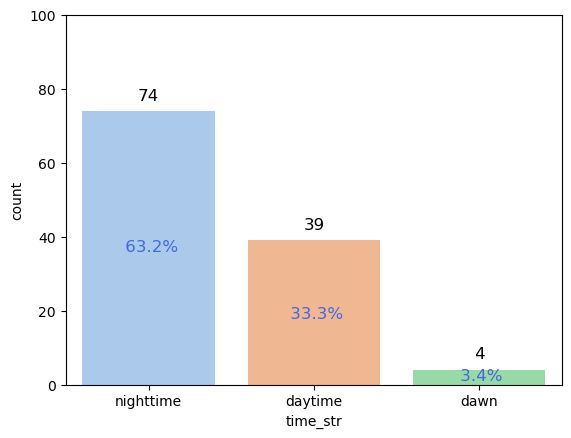

In [162]:
time_ax = sns.countplot(x='time_str', data=folders,
                   palette = sns.color_palette("pastel"), order = folders['time_str'].value_counts().index)

# countplot에 값 표시
for p in time_ax.patches:
    height = p.get_height()
    # count
    time_ax.text(p.get_x() + p.get_width() / 2. , height + 3, 
                 int(height), ha = 'center', size = 12)
    # percentage
    time_ax.text(p.get_x() + p.get_width() / 2. , height//2-1, 
                 f'{(p.get_height()/len(folders))*100: 1.1f}%', ha = 'center', size = 12, color='royalblue')
time_ax.set_ylim(0, 100)

## 날씨 분포 시각화

- sunny
- rainy
- snow

(0.0, 100.0)

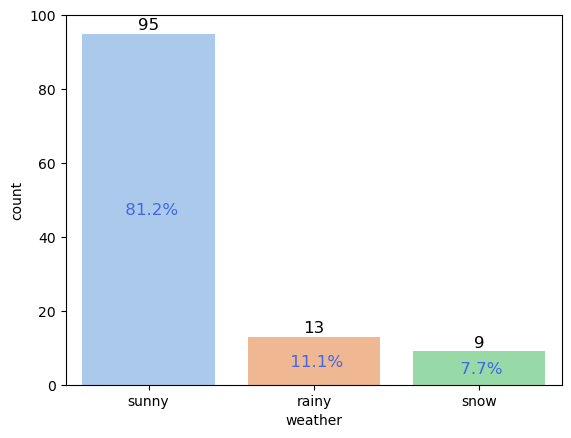

In [163]:
weather_ax = sns.countplot(x='weather', data=folders,
                   palette = sns.color_palette("pastel"), order = folders['weather'].value_counts().index)

# countplot에 값 표시
for p in weather_ax.patches:
    height = p.get_height()
    # count
    weather_ax.text(p.get_x() + p.get_width() / 2. , height + 1, 
                    int(height), ha = 'center', size = 12)
    # percentage
    weather_ax.text(p.get_x() + p.get_width() / 2. , height//2-1, 
                 f'{(p.get_height()/len(folders))*100: 1.1f}%', ha = 'center', size = 12, color='royalblue')
weather_ax.set_ylim(0, 100)